In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [36]:
status = pd.read_csv('./csv/status_of_cases.csv').set_index('last_update')
status = status.set_index(pd.to_datetime(status.index))

In [37]:
s = status.groupby(status.index.date).positive_confirmed.max()
s = pd.DataFrame(s)
s['new_case'] = s.diff()
s.style.bar(subset=["positive_confirmed",], color='#FFA07A')\
                 .bar(subset=["new_case"], color='#ee1f5f')

,positive_confirmed,new_case
2020-02-18,2,nan
2020-02-19,2,0
2020-02-20,1,-1
2020-02-24,1,0
2020-02-26,1,0
2020-03-05,18,17
2020-03-06,22,4
2020-03-07,24,2
2020-03-09,31,7
2020-03-10,31,0


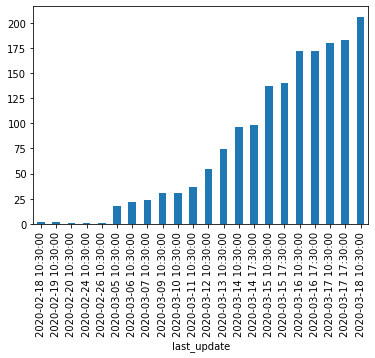

In [38]:
status['positive_confirmed'].plot.bar();

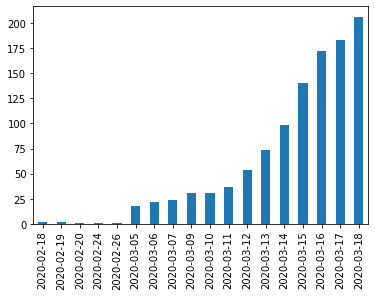

In [39]:
status.positive_confirmed.groupby(status.index.date).max().plot.bar();

In [40]:
df = pd.read_csv('./csv/cases.csv').set_index('last_update')
df.index = pd.to_datetime(df.index)
df.tail(20)

,case_number,hospital,patient,public_health_unit,status,transmission
last_update,,,,,,
2020-03-18 10:30:00,193,NaN,50s female,toronto,self-isolating,"travel (usa), close contact"
2020-03-18 10:30:00,194,NaN,30s male,toronto,self-isolating,travel (brazil)
2020-03-18 10:30:00,195,NaN,50s female,halton,self-isolating,"travel (usa, carribean)"
2020-03-18 10:30:00,196,NaN,50s female,halton,self-isolating,"travel (usa), close contact"
2020-03-18 10:30:00,197,NaN,60s female,peel,self-isolating,close contact
2020-03-18 10:30:00,198,NaN,50s male,toronto,self-isolating,"travel (japan, uk, germany)"
2020-03-18 10:30:00,199,NaN,40s male,halton,self-isolating,pending
2020-03-18 10:30:00,200,NaN,40s female,waterloo,self-isolating,"travel (pakistan, turkey)"
2020-03-18 10:30:00,201,NaN,70s male,hamilton,self-isolating,travel (mexico)


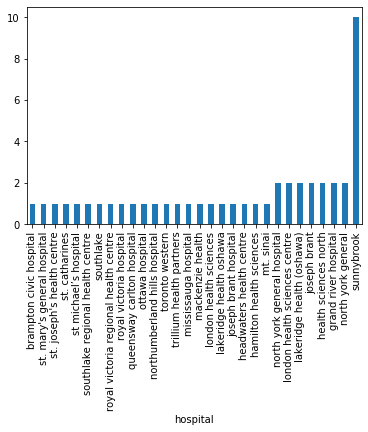

In [41]:
df[df.hospital != 'pending'].groupby('hospital').case_number.nunique().sort_values().plot.bar();

In [42]:
df_toronto = df[df.public_health_unit.str.contains('simcoe')]
df_toronto.case_number.groupby(df_toronto.index.date).count()

2020-03-12    1
2020-03-15    4
2020-03-18    1
Name: case_number, dtype: int64